In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Environment setup

### Library preparation

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.close('all')

In [3]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df
from JJ_data_processing import xy_by_id,extract_Isw_R0_by_id


from JJformulas import *
from meas_util import *

from JJmeasurement import *

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# Sample discription and runid matrix

In [93]:
jj = JJmeas(sample = 'D070B1N5v1')

jj.db_connect()

# Meas

## IVC overview

<IPython.core.display.Javascript object>


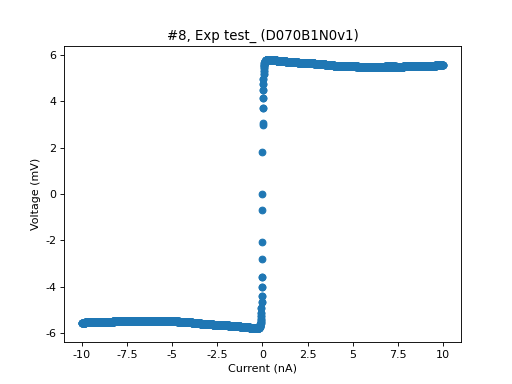

In [5]:
jj.pbi(8)

<IPython.core.display.Javascript object>


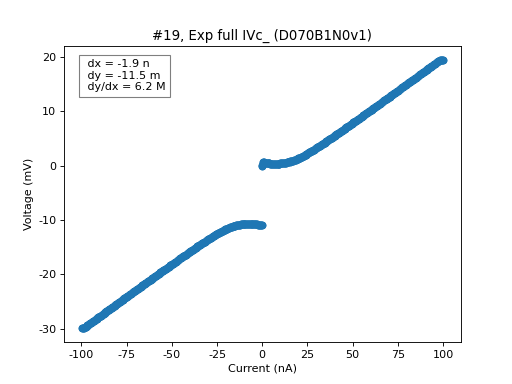

In [36]:
pbi(19, interactive = True)

Rn = 238k
N = 11.2 / 2/ 450 = 14

In [16]:
11.2 / 2/ 400

0.013999999999999999

In [17]:
7/(238/14)

0.4117647058823529

In [26]:
N5old = JJmeas(sample = 'D070B1N5')

<IPython.core.display.Javascript object>


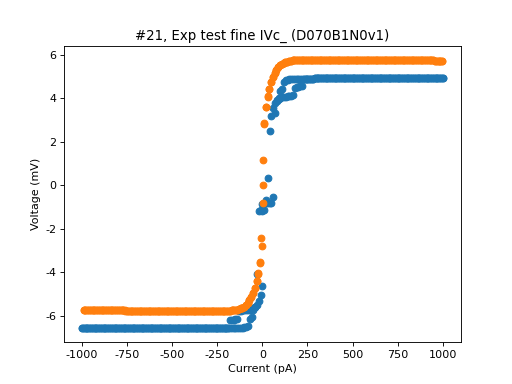

In [13]:
ax = N5old.pbi(1)


jj.pbi(21, axes = ax)

## Fine Ivc

<IPython.core.display.Javascript object>


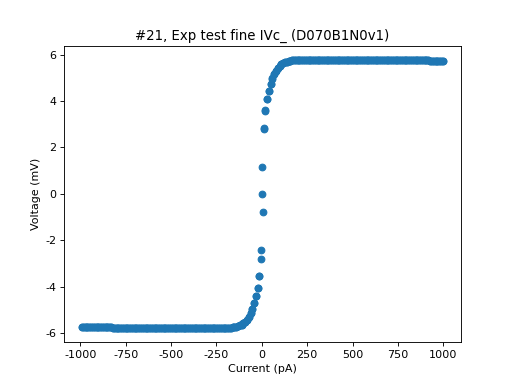

In [44]:
pbi(21)

<IPython.core.display.Javascript object>


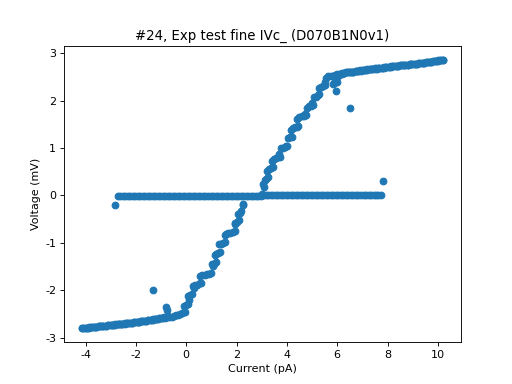

In [52]:
pbi(24)

<IPython.core.display.Javascript object>


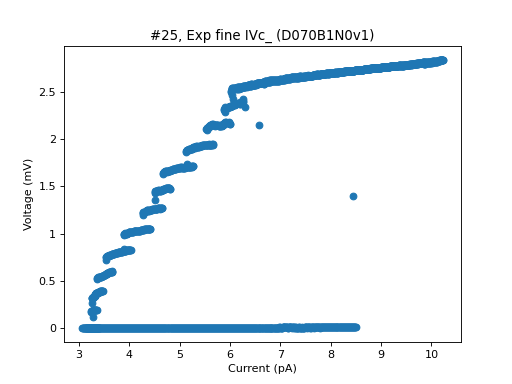

In [73]:
pbi(25, interactive = True)

made a mistake with labelling, this is N5 but N0 device

R0 = 1.8M

<IPython.core.display.Javascript object>


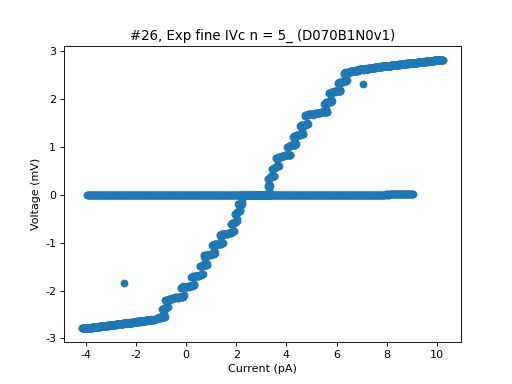

In [18]:
jj.pbi(26)

what's the meaning of step size? 400 or 200? lets meas for higher I, mb there are more steps?

<IPython.core.display.Javascript object>


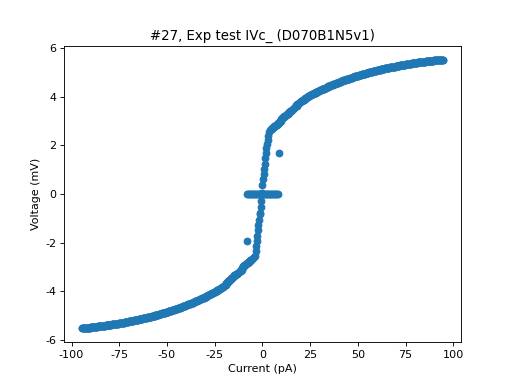

In [15]:
jj.pbi(27)

ok, take a look on the steps in the middle

<IPython.core.display.Javascript object>


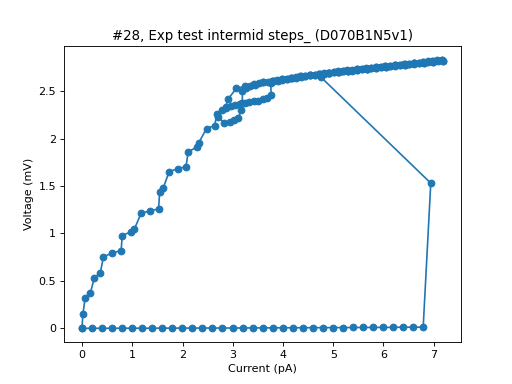

In [22]:
jj.pbi(28, ls = '-')

<IPython.core.display.Javascript object>


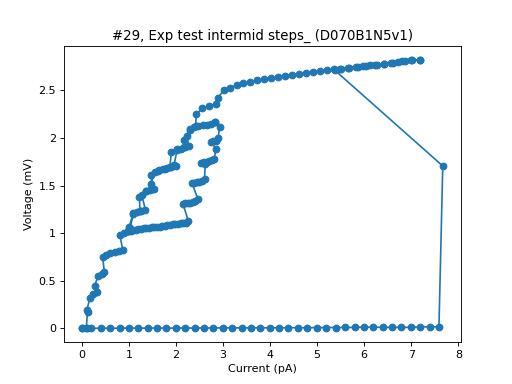

In [26]:
jj.pbi(29, ls = '-')

<IPython.core.display.Javascript object>


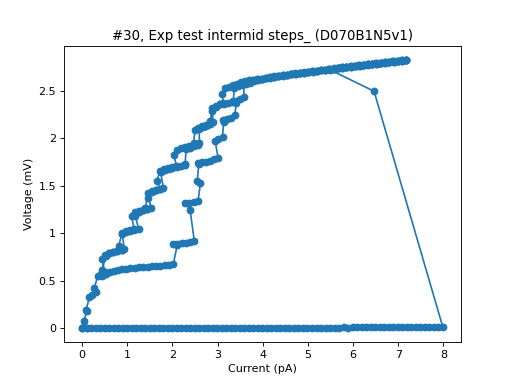

In [32]:
jj.pbi(30, ls = '-')

<IPython.core.display.Javascript object>


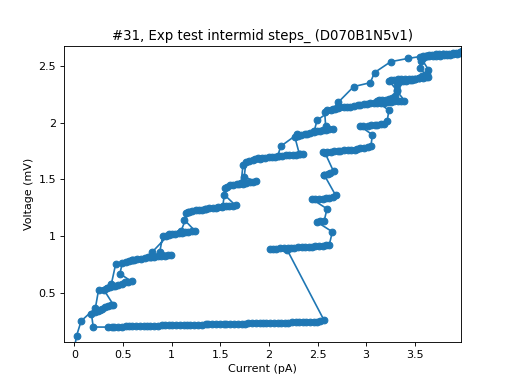

In [37]:
jj.pbi(31, ls = '-')

## B scan

<IPython.core.display.Javascript object>


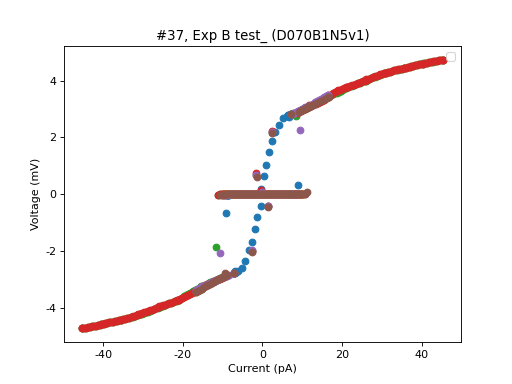

No handles with labels found to put in legend.


In [46]:
jj.bpbi(range(32,37+1), marker = 'o', ls = '')

<IPython.core.display.Javascript object>


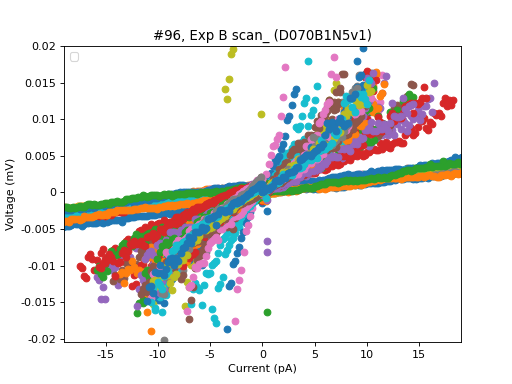

No handles with labels found to put in legend.


In [70]:
jj.bpbi(range(46,96+1), marker = 'o', ls = '')

In [82]:
B_list =   np.linspace(-2e-3, 2e-3, 51)

ids = range(46,96+1)

Ics = [extract_Isw_R0_by_id (idx, dy = 30e-6)[0] for idx in ids]




<IPython.core.display.Javascript object>


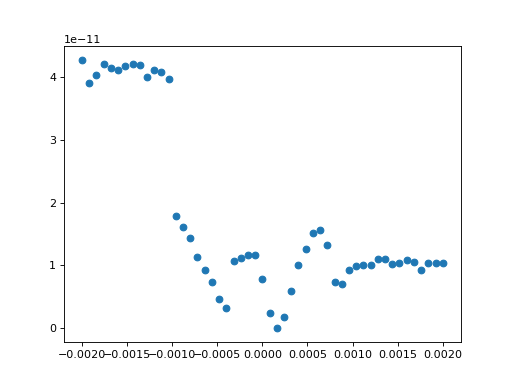

In [84]:
fig, ax = plt.subplots()
ax.plot(B_list, Ics, 'o')

ok, beyond abs(B) > 1mA datapoints dont make sense (hit the B limit), but why Ic is so big there?

<IPython.core.display.Javascript object>


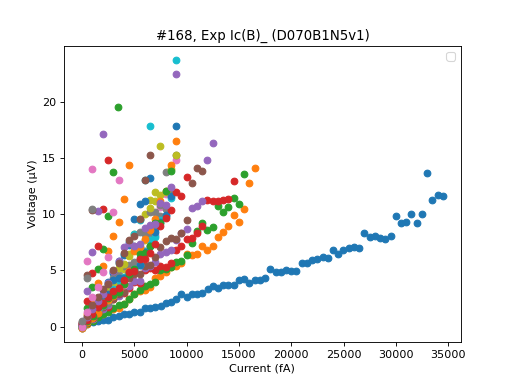

No handles with labels found to put in legend.


In [108]:
jj.bpbi(range(141,168+1), marker = 'o', ls = '-')

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


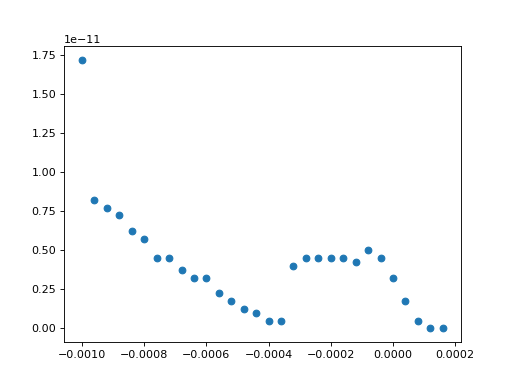

In [115]:
B_list =   np.linspace(-1e-3, 1e-3, 51)[:30]
# B_list =   np.linspace(-1e-3, 1e-3, 51)[32:]

ids = range(141,170+1)
# ids = range(173,191+1)

Ics = [extract_Isw_R0_by_id (idx, dy = 30e-6)[0] for idx in ids]


fig, ax = plt.subplots()
ax.plot(B_list, Ics, 'o')

## B - =1m steps

Somethnig happens at B = -1m, lets do more careful scan there

cn we just scale up B=0 curve to match them?

<IPython.core.display.Javascript object>


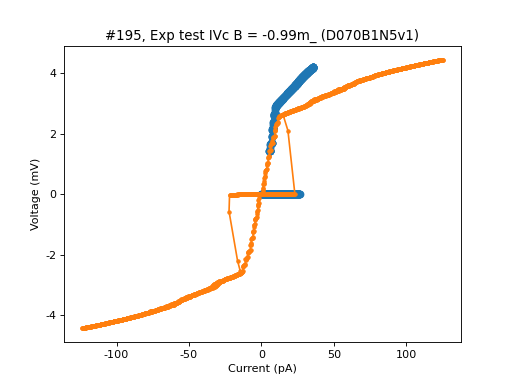

In [166]:
# ax = jj.pbi(193)
ax = jj.pbi(195)

# I, V = xy_by_id(26)
I, V = xy_by_id(194)

# I -= 2.7e-12
I += 0.2e-12
I = I *3.5

ax.plot(I,V, '.-')

<IPython.core.display.Javascript object>


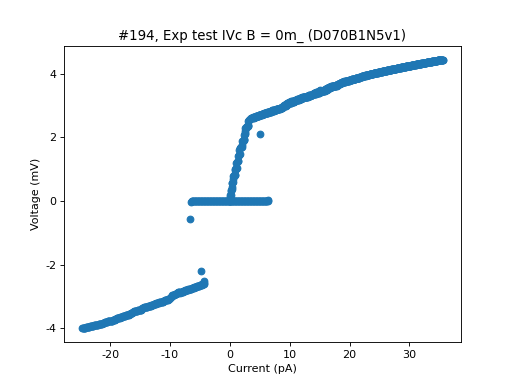

In [149]:
jj.pbi(194)

coompare with B =0 

<IPython.core.display.Javascript object>


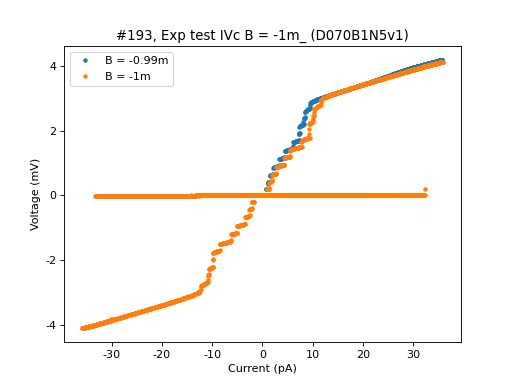

In [168]:
jj.bpbi([195, 193], labels = ['B = -0.99m','B = -1m'], marker = '.', ls = '')

<IPython.core.display.Javascript object>


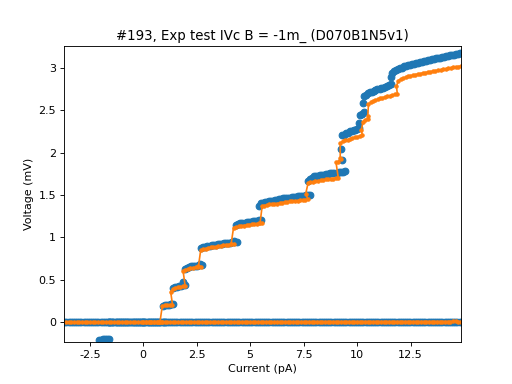

In [170]:
# ax = jj.pbi(193)
ax = jj.pbi(193)

# I, V = xy_by_id(26)
I, V = xy_by_id(195)

# I -= 2.7e-12
# I += 0.2e-12
I = I *1.25

ax.plot(I,V, '.-')

need samller Rsh for easier observation of steps? or just start from high bias?

Rsh = 1e8

<IPython.core.display.Javascript object>


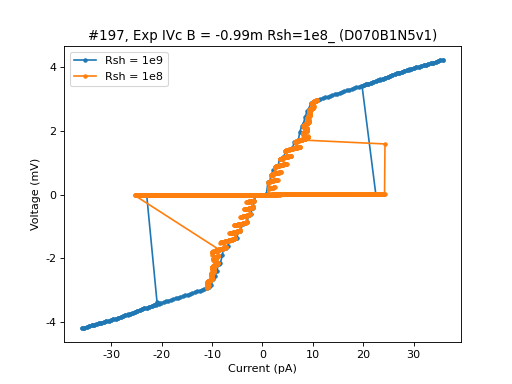

In [193]:
jj.bpbi([201, 197], labels = ['Rsh = 1e9','Rsh = 1e8'], marker = '.', ls = '-')

anyway, it's worth checking whether the flux is trapped - try n78n5

doenst work - go back to this sample, check if everything works

<IPython.core.display.Javascript object>


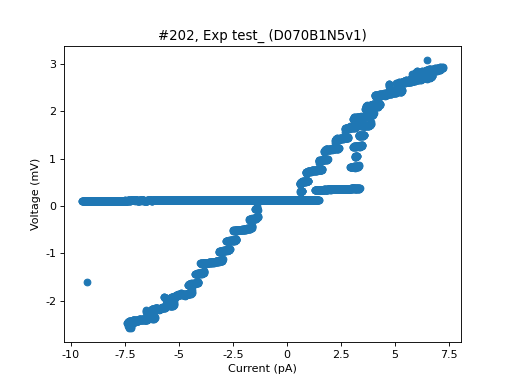

In [197]:
jj.pbi(202)

want to trace critical current at different steps

## interm steps

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


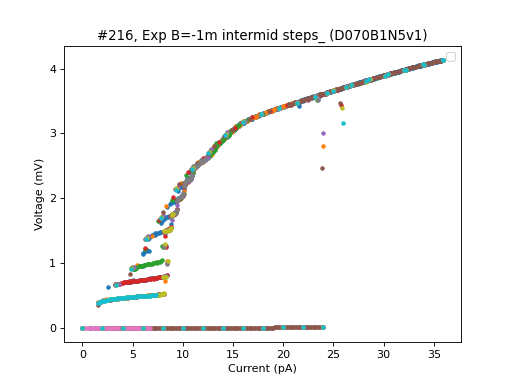

No handles with labels found to put in legend.


In [232]:
jj.bpbi(range(207, 216+1), ls = '', marker = '.')

repeat for B = 0

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


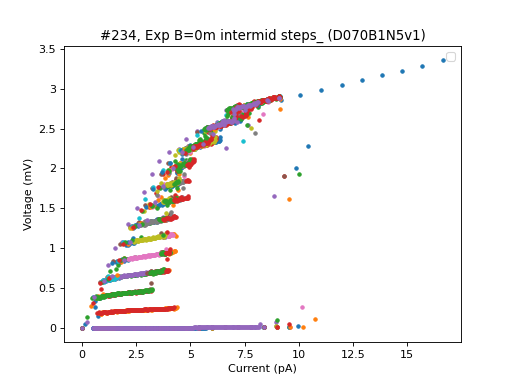

No handles with labels found to put in legend.


In [298]:
jj.bpbi(range(220, 234+1), ls = '', marker = '.')

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


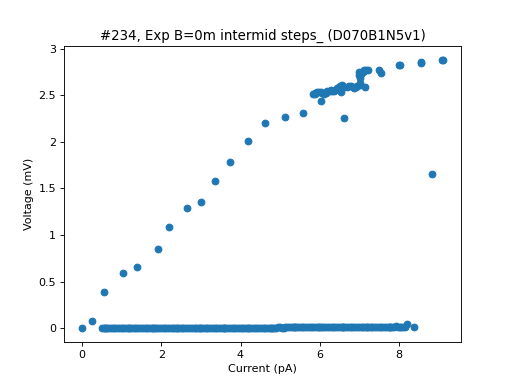

In [297]:
pbi(234)

combine

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


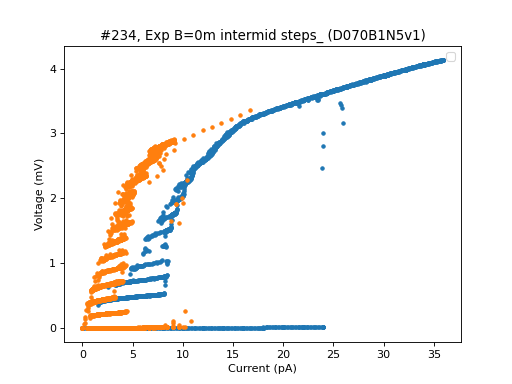

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [318]:
ax = jj.bpbi(range(207, 216+1), ls = '', marker = '.', c = 'C0')
jj.bpbi(range(220, 234+1), ls = '', marker = '.', c = 'C1', ax = ax)

## Ic(B) with steps

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


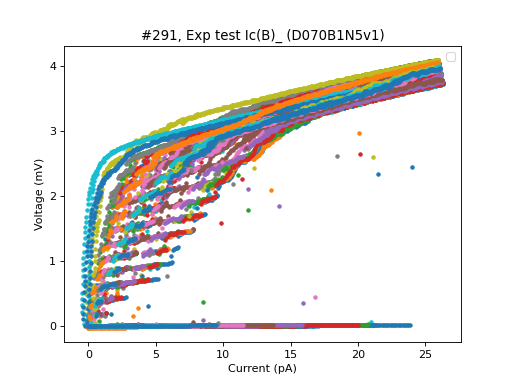

No handles with labels found to put in legend.


In [323]:
jj.bpbi(range(241, 291+1), marker = '.', ls = '')

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


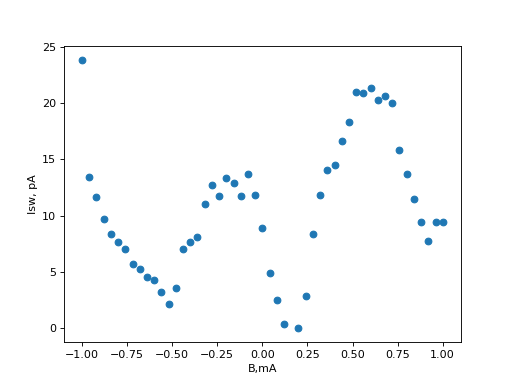

Text(0.5, 0, 'B,mA')

In [414]:
B_list =   np.linspace(-1e-3, 1e-3, 51)
ids = range(241, 291+1)


Ics = [2/1e-12*extract_Isw_R0_by_id (idx, dy = 30e-6, yoff =0 )[0] for idx in ids]


fig, ax = plt.subplots()
ax.plot(B_list/1e-3, Ics, 'o')

ax.set_ylabel('Isw, pA')
ax.set_xlabel('B,mA')

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


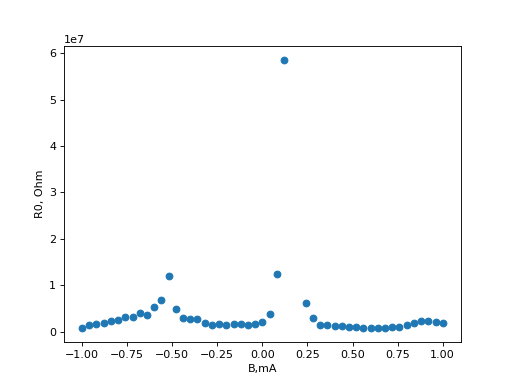

Text(0.5, 0, 'B,mA')

In [417]:
B_list =   np.linspace(-1e-3, 1e-3, 51)
ids = range(241, 291+1)


R0s = [extract_Isw_R0_by_id (idx, dy = 30e-6, yoff =0 )[1] for idx in ids]


fig, ax = plt.subplots()
ax.plot(B_list/1e-3, R0s, 'o')

ax.set_ylabel('R0, Ohm')
ax.set_xlabel('B,mA')

check ivc at nearFF

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


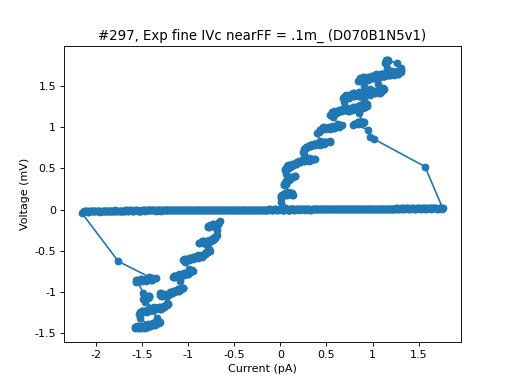

In [350]:
jj.pbi(297, ls = '-')

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


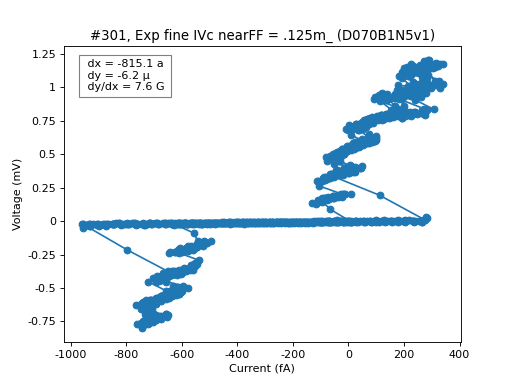

In [474]:
jj.pbi(301, ls = '-', interactive = True)

30Mohm

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


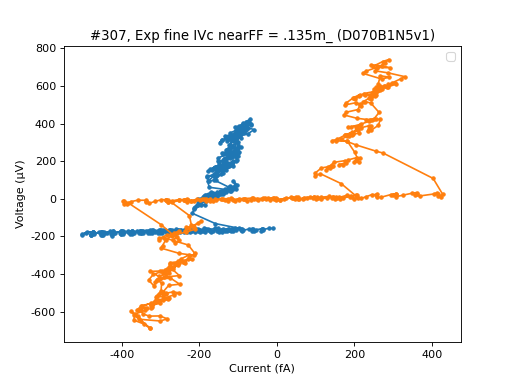

No handles with labels found to put in legend.


In [385]:
jj.bpbi([304, 307], ls = '-', marker = '.')

large oscillations related to T??

try even closer to FF

noisy, Navg = 10

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


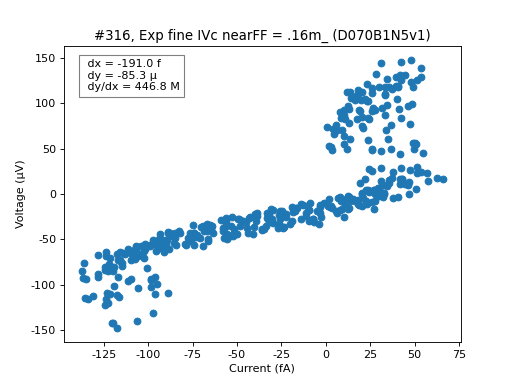

In [473]:
jj.pbi(316, ls = '', interactive = True)

R ~ 450 M

so, T setpoint was 30mk all the time (and T8 ~ 30 - 31), so feedback loop was on. mb it would be better if i disconnect it?

what if meas zero bias V as a function of t? say at diff B?

## Time scans

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


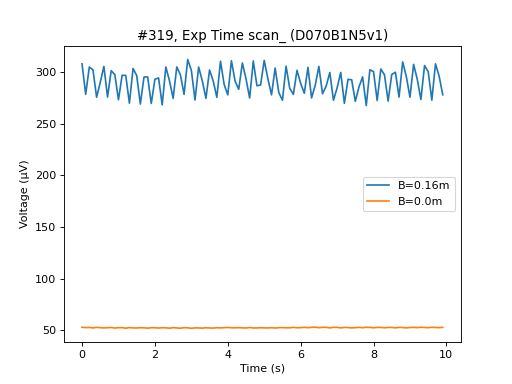

In [444]:
jj.bpbi([318, 319], ls = '-', labels = ['B=0.16m', 'B=0.0m'])

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


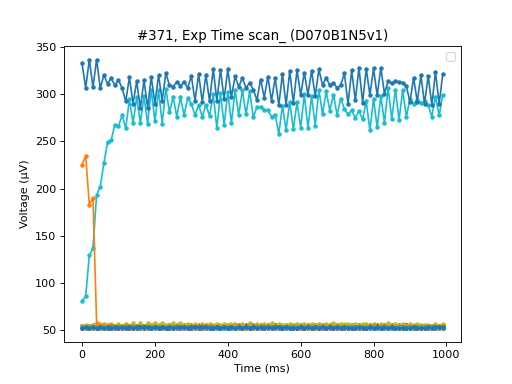

No handles with labels found to put in legend.
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


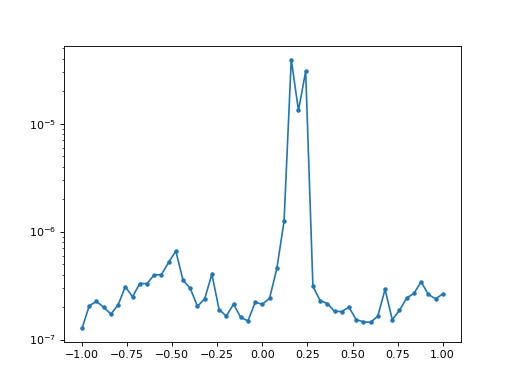

In [466]:
ids = range(321, 371+1)

jj.bpbi(ids, ls = '-', marker = '.')

std = [np.std(xy_by_id(idx)[1]) for idx in ids]
 
fig, ax = plt.subplots()


B_list = np.linspace(-1e-3, 1e-3, 51) 
ax.plot(B_list/1e-3, std, '.-') 
ax.set_yscale('log')

closer look at FF

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


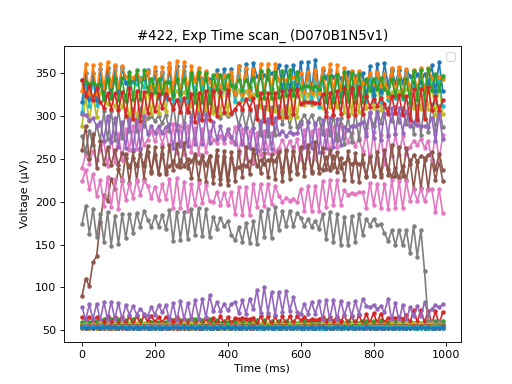

No handles with labels found to put in legend.
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


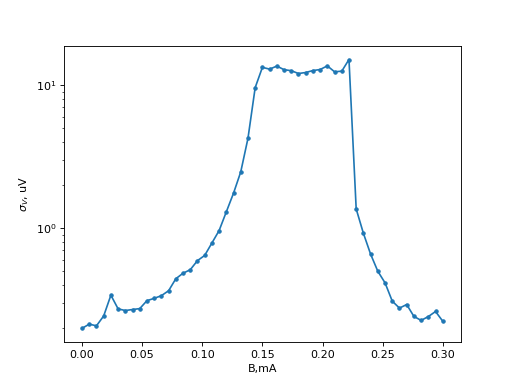

Text(0.5, 0, 'B,mA')

In [485]:
ids = range(372, 422+1)

jj.bpbi(ids, ls = '-', marker = '.')

std = [1e6*np.std(xy_by_id(idx)[1][10:-5]) for idx in ids]
 
fig, ax = plt.subplots()


B_list = np.linspace(0e-3, .3e-3, 51) 
ax.plot(B_list/1e-3, std, '.-') 
# ax.plot( std, '.-') 
ax.set_yscale('log')

ax.set_ylabel(r'$\sigma_V$, uV')
ax.set_xlabel('B,mA')

check what happens with noise with diff Rsh

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


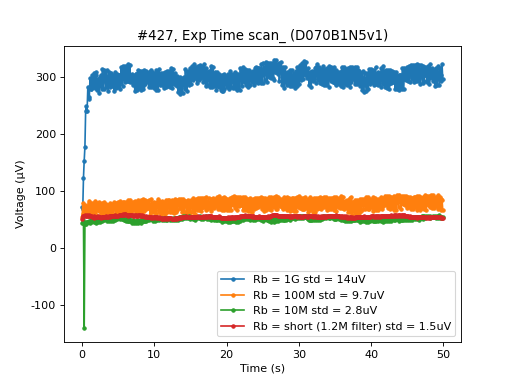

In [503]:
ids = [423, 424, 425, 427]

std = [1e6*np.std(xy_by_id(idx)[1][10:-5]) for idx in ids]
labs = ['Rb = 1G std = {:1.2g}uV'.format(std[0]),
        'Rb = 100M std = {:1.2g}uV'.format(std[1]),
        'Rb = 10M std = {:1.2g}uV'.format(std[2]),
        'Rb = short (1.2M filter) std = {:1.2g}uV'.format(std[3])]


jj.bpbi(ids , ls = '-', marker = '.', labels = labs)

thermal noise from Rb??

remeas ZZ (B = 0.16mA) with short Rb (means we have only 1M filter + 200k onchip)

have to replace Rsh 1 M with 

## Rb = short

start with ZF B = 0

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


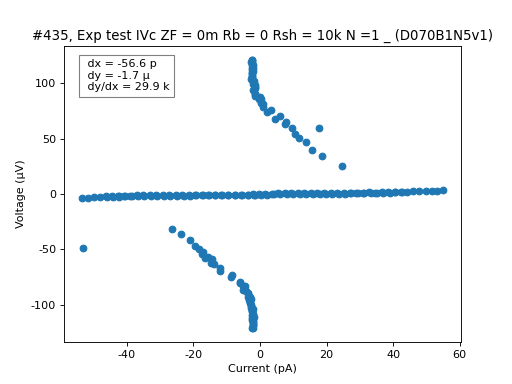

In [530]:
jj.pbi(435, interactive = True)

R0 is definetely smaller! ~ 30 k 

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


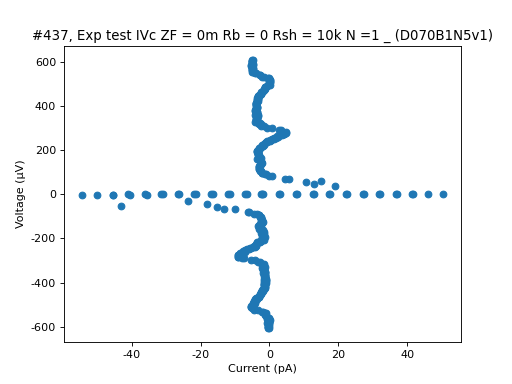

In [531]:
jj.pbi(437)

is it possible to meaasure full ivc with this method?

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


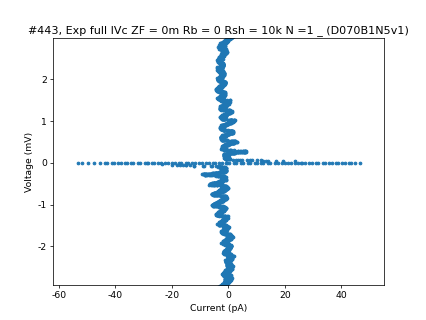

In [574]:
jj.pbi(443, marker = '.')

it should be vertical line, not a negative, correct rsh rb?

done., it's kind of sensitive to Rsh, like 10k -> 10.07k makes a difference

ok, now quick B scan to check periodicity

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


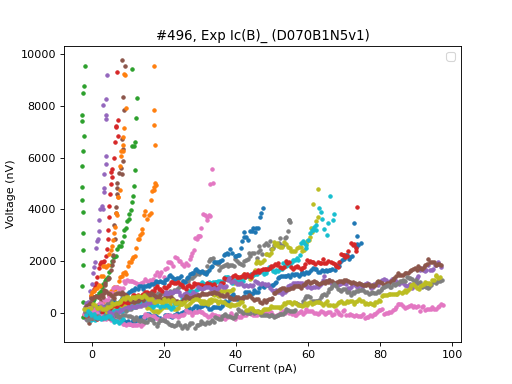

No handles with labels found to put in legend.


In [563]:
jj.bpbi(range(477, 496+1), ls = '', marker = '.')

huge cc at -1mA. remeasure with better res + comare with old one

## new Bscan

..\..\_jjtools\JJ_data_processing.py:276: RuntimeWarning: invalid value encountered in less
  ind1 = np.where(np.abs(vA0) < dx )
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


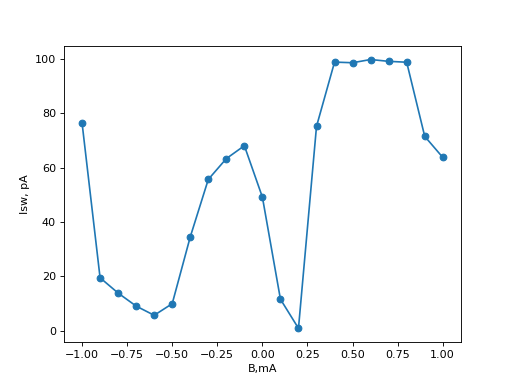

Text(0.5, 0, 'B,mA')

In [565]:
B_list =   np.linspace(-1e-3, 1e-3, 21)
ids = range(477, 497+1)


Ics = [2/1e-12*extract_Isw_R0_by_id (idx, dy = 30e-6, yoff =0 )[0] for idx in ids]


fig, ax = plt.subplots()
ax.plot(B_list/1e-3, Ics, '-o')

ax.set_ylabel('Isw, pA')
ax.set_xlabel('B,mA')

go to B = 0.611mA

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


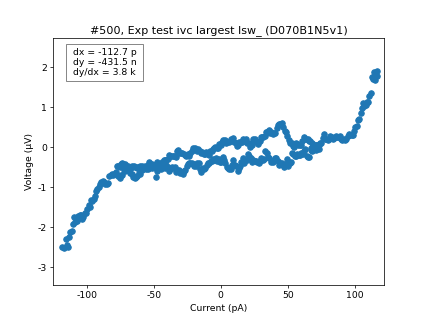

In [578]:
jj.pbi(500, interactive = True)

R0 < 20k (actually not distinguashable form noise)

and compare with B = -1mA, with diff Rb

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


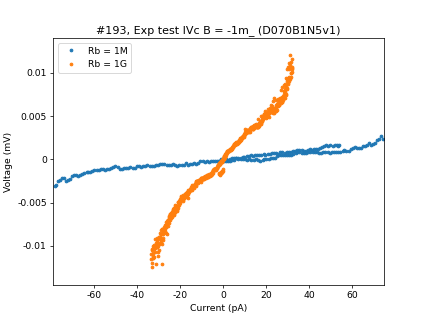

In [570]:
jj.bpbi([501, 193 ], marker = '.', ls = '', labels = ['Rb = 1M', 'Rb = 1G'])

and B = 0 for comparison

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


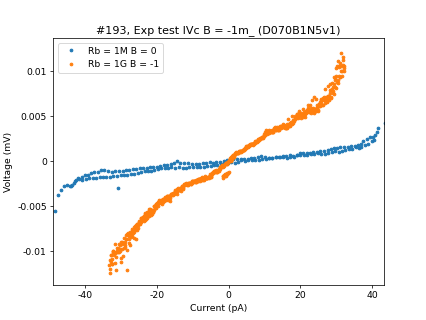

In [577]:
jj.bpbi([503, 193 ], marker = '.', ls = '', labels = ['Rb = 1M B = 0', 'Rb = 1G B = -1'])

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


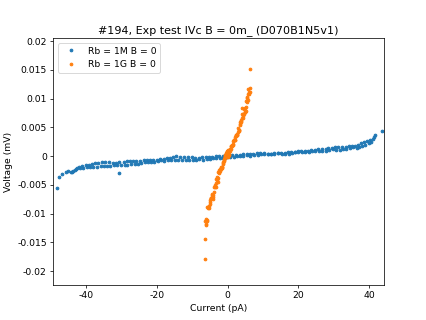

In [576]:
jj.bpbi([503, 194 ], marker = '.', ls = '', labels = ['Rb = 1M B = 0', 'Rb = 1G B = 0'])

I'm curiuos about near FF, can we see critical current there?

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


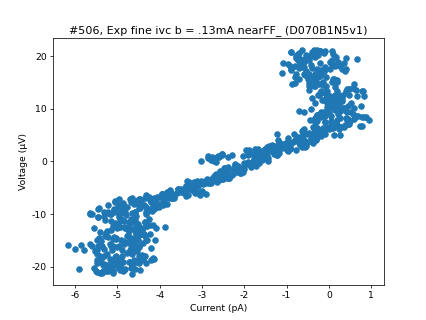

In [592]:
jj.pbi(506, interactive = True)

here R0 ~ 3 M

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


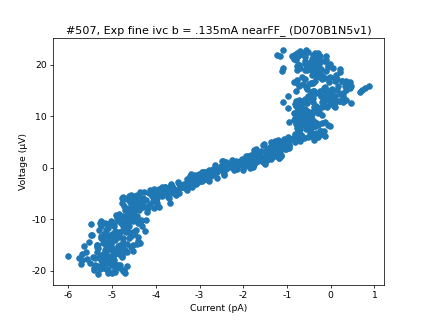

In [595]:
jj.pbi(507, interactive = True)

ok, Navg = 10 for B = 0

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


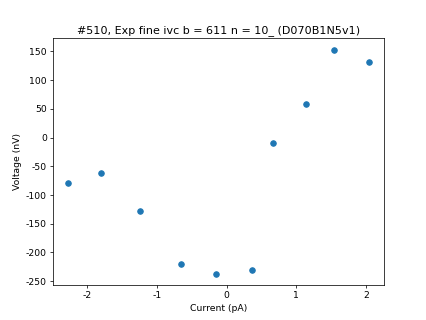

In [600]:
jj.pbi(510)

## After warm-up for flux retrapping

- check periodicity

- check Ioffset, is it due to Vmeter?

- Change temp of Rb

- filter before Rsh

- try direct connection to keith


First, meas IVc B = 0, Rb = 1M

<IPython.core.display.Javascript object>


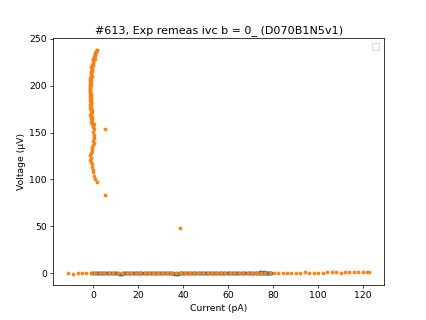

No handles with labels found to put in legend.


In [12]:
jj.bpbi([612, 613], marker = '.', ls = '')

- 

it works, B = 0 seems to be ZF

now rought Bscan

<IPython.core.display.Javascript object>


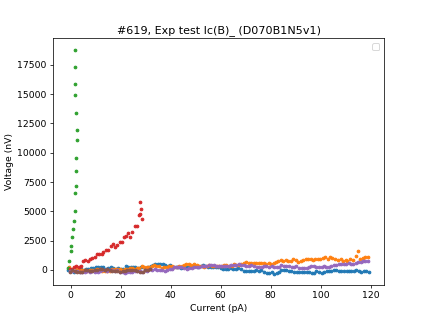

No handles with labels found to put in legend.


In [21]:
jj.bpbi(range(614, 619+1), marker = '.', ls = '')

need more points + span greater than 120pA, but nearFF = 750uA

swap Vmeter polarity, check Ioffset

<IPython.core.display.Javascript object>


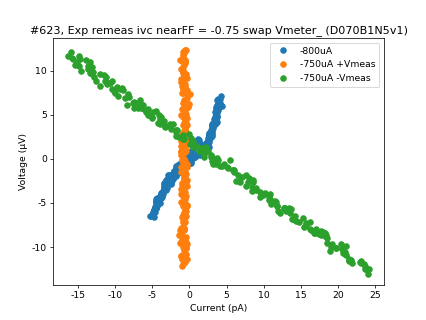

In [30]:
jj.bpbi([621, 622, 623], labels = [ '-800uA', '-750uA +Vmeas', '-750uA -Vmeas'])

<IPython.core.display.Javascript object>


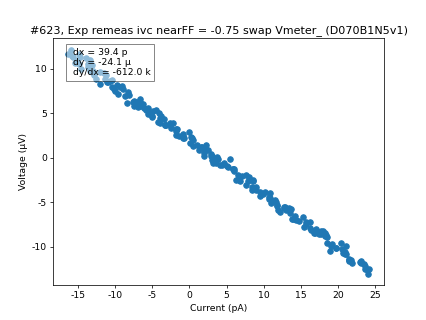

In [31]:
jj.pbi(623, interactive = True)

why?? ground matters? repeat with direct connection vmeater to preamp

<IPython.core.display.Javascript object>


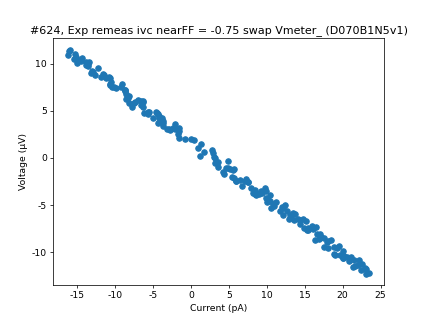

In [32]:
jj.pbi(624)

flip Isrc polarity as well

<IPython.core.display.Javascript object>


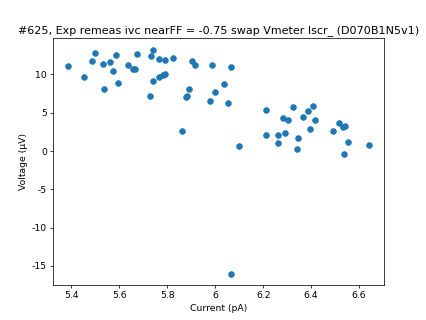

In [33]:
jj.pbi(625)

<IPython.core.display.Javascript object>


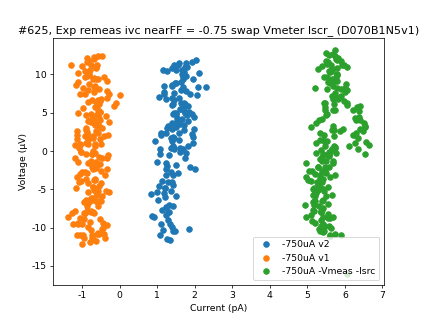

In [37]:
jj.bpbi([626, 622, 625], labels = [ '-750uA v2', '-750uA v1', '-750uA -Vmeas -Isrc'])

mb this Ioffset due to Voffset?

ok, that doesnt tell much, what abt symmetry og ivc?

<IPython.core.display.Javascript object>


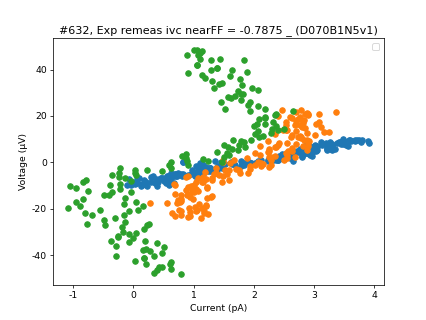

No handles with labels found to put in legend.


In [47]:
jj.bpbi([630, 631, 632])

ivc is symmetric thou. mb just shift in Imeas due to Vmeter offset?

ok Bscan again, w more points

<IPython.core.display.Javascript object>


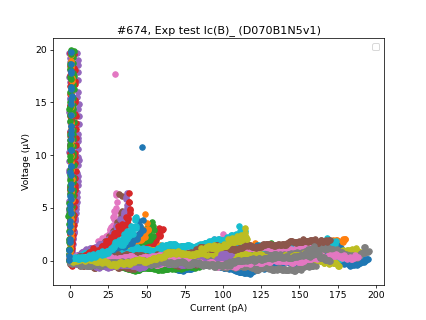

No handles with labels found to put in legend.


In [58]:
jj.bpbi(range(634, 674+1))

..\..\_jjtools\JJ_data_processing.py:285: RuntimeWarning: invalid value encountered in less
  ind1 = np.where(np.abs(vA0) < dx )


<IPython.core.display.Javascript object>


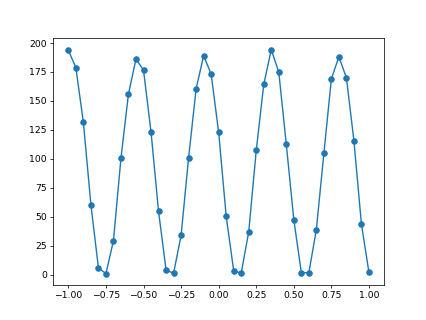

In [63]:
B_list =   np.linspace(-1e-3, 1e-3, 41)

ids = range(634,674+1)

Ics = [2e12*extract_Isw_R0_by_id (idx, dy = 30e-6)[0] for idx in ids]


fig, ax = plt.subplots()
ax.plot(B_list/1e-3, Ics, 'o-')

it's periodic! now lets do fine B scan

## fine Bscan


<IPython.core.display.Javascript object>


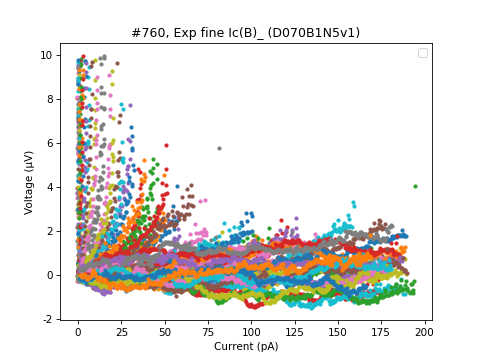

No handles with labels found to put in legend.


In [74]:
jj.bpbi(range(689, 760+1), marker = '.')

<IPython.core.display.Javascript object>


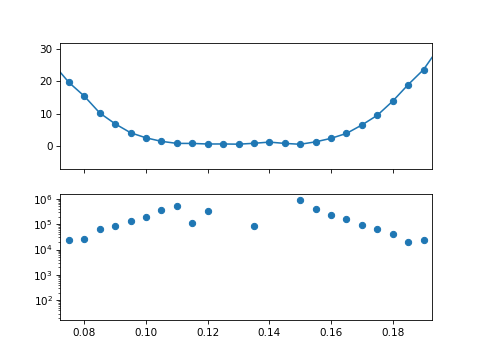

In [82]:
B_list = np.linspace(-.4e-3, .2e-3, 121)

ids = range(689,809+1)

Ics = [2e12*extract_Isw_R0_by_id (idx, dy = 30e-6)[0] for idx in ids]
R0s = [1/15*extract_Isw_R0_by_id (idx, dy = 30e-6)[1] for idx in ids]


fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
ax1.plot(B_list*1e3, Ics, 'o-')

# fig, ax = plt.subplots()
ax2.plot(B_list*1e3, R0s, 'o')
ax2.set_yscale('log')

In [112]:
jj.ZF   = -0.093e-3
jj.FF   = 0.130e-3



..\..\_jjtools\JJ_data_processing.py:285: RuntimeWarning: invalid value encountered in less
  ind1 = np.where(np.abs(vA0) < dx )


<IPython.core.display.Javascript object>


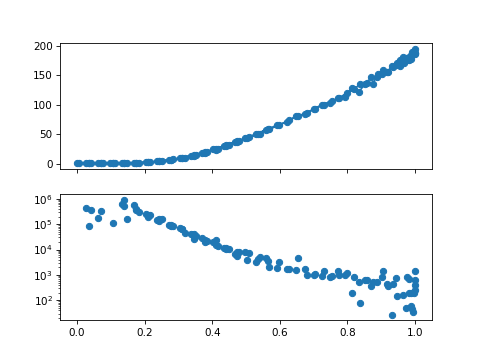

In [113]:
B_list = np.linspace(-.4e-3, .2e-3, 121)
cos_list = abs (jj.B_to_cos(B_list))

ids = range(689,809+1)

Ics = [2e12*extract_Isw_R0_by_id (idx, dy = 30e-6)[0] for idx in ids]
R0s = [1/15*extract_Isw_R0_by_id (idx, dy = 30e-6)[1] for idx in ids]


fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
ax1.plot(cos_list, Ics, 'o-')

# fig, ax = plt.subplots()
ax2.plot(cos_list, R0s, 'o')
ax2.set_yscale('log')

nice curve, try fine ivc near FF

<IPython.core.display.Javascript object>


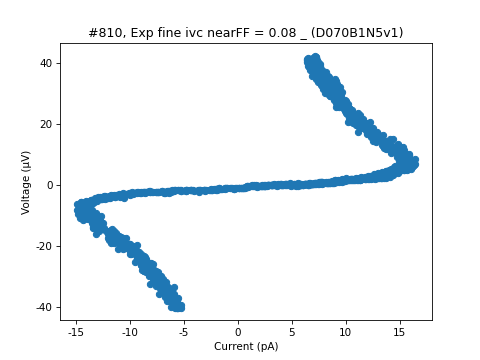

In [83]:
jj.pbi(810, interactive = True)

<IPython.core.display.Javascript object>


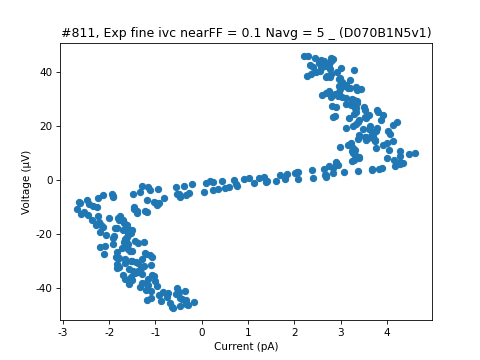

In [87]:
jj.pbi(811, interactive = True)

<IPython.core.display.Javascript object>


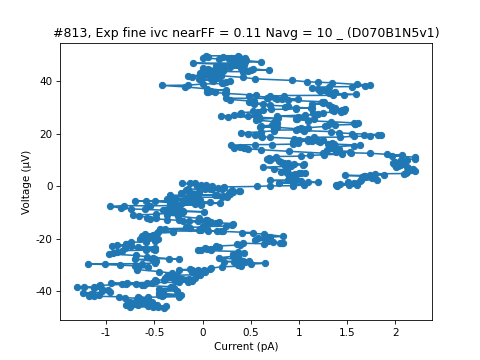

In [92]:
jj.pbi(813, ls = '-')

ok, need even more avging - lets do it later/overnight

now, compare again Rb = 1 G and Rb = 1M

## Study of Rb

<IPython.core.display.Javascript object>


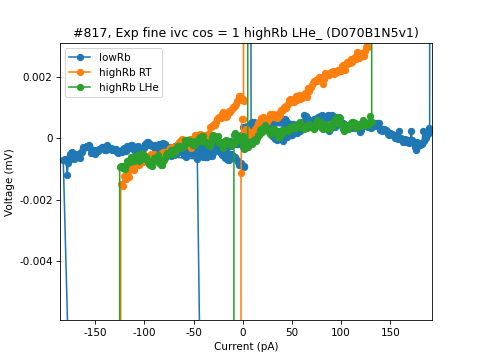

In [336]:
jj.bpbi([814, 815, 817], ls = '-',
        labels = ['lowRb', 'highRb RT', 'highRb LHe'])

Rb temperature clearly changes R0! But doesnt change Isw?? Mb Ibias recalculation is wrong??

also check if R=1G drops with T?? 

## some debugging

meas V across Rb amp = 200, stp = 1

<IPython.core.display.Javascript object>


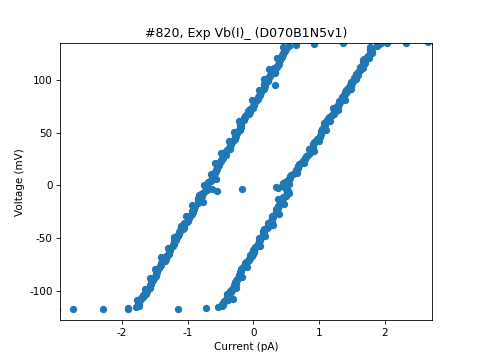

In [156]:
jj.pbi(820)

**mesured with shunt on**

above Imax = 130pA, that's consistent with Vmax = 130mV across 1 GOhm

shift in x axis due to I recalculation using V, now it's 'wrong' V



now shunt off

weird, mb i'm introducing more noise with such connection?

<IPython.core.display.Javascript object>


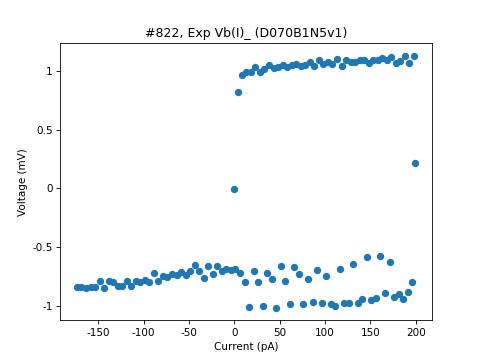

In [166]:
jj.pbi(822)

redo Rb temp meas

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


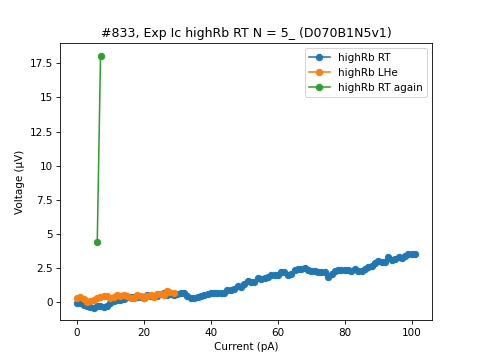

In [189]:
jj.bpbi([824, 830, 833], ls = '-',
        labels = [ 'highRb RT', 'highRb LHe', 'highRb RT again'])

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


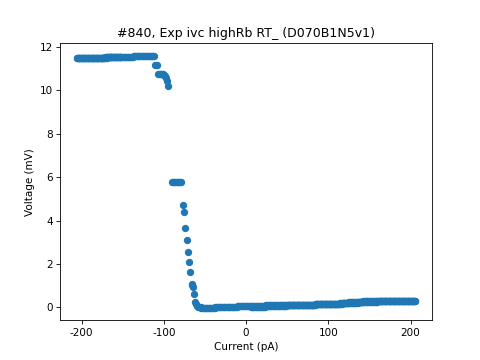

In [212]:
jj.pbi(840)

WTF?? cannot measure usual ivc (polarity was swapped for purpose). or Bfield shifted so much that this is nearFF now? 

shift in Ibias?

switch back to lowRb

weak wires in the box, I channel. try again after soldering

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


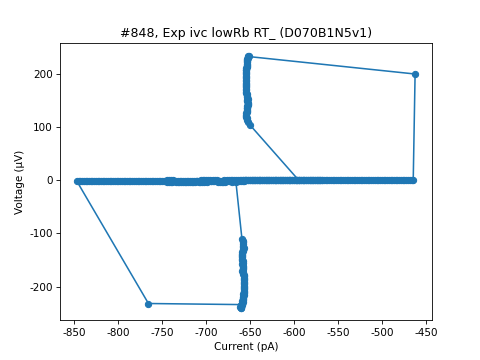

In [232]:
jj.pbi(848, ls = '-')

looks fine, but wthat the heck is with i offset??



C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


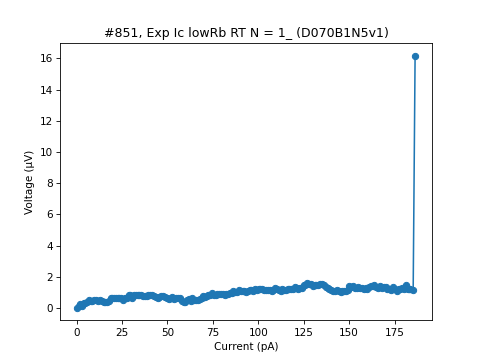

In [241]:
jj.pbi(851, ls = '-')

check also nearFF cos = .25

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


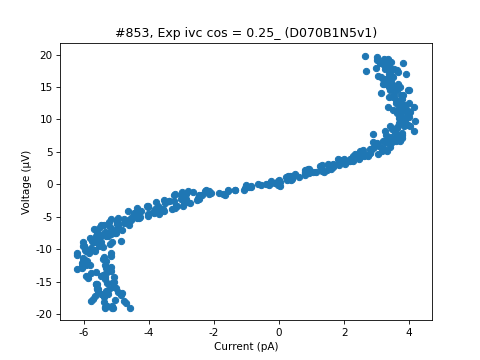

In [249]:
jj.pbi(853, interactive = True)

and .2

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


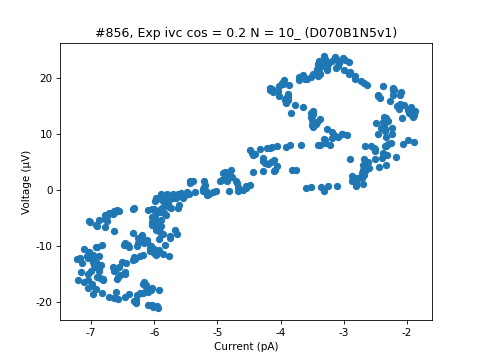

In [255]:
jj.pbi(856, interactive = True)

and .225

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


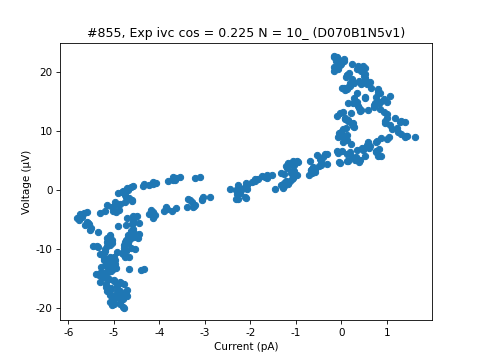

In [254]:
jj.pbi(855, interactive = True)

it was minor error in the code, now looks fine (probably it also solves that issue with fA range offsets)

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


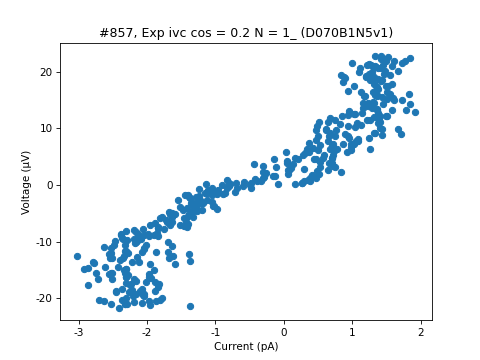

In [257]:
jj.pbi(857)

## fine Bscan udu IVc near FF

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


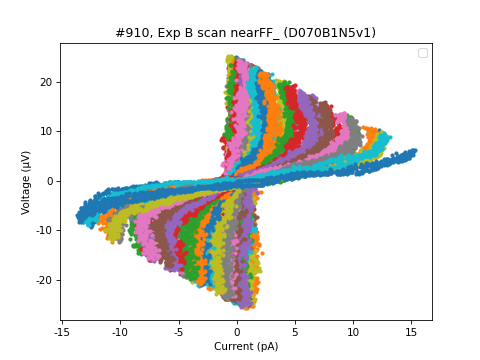

No handles with labels found to put in legend.


In [282]:
jj.bpbi(range(860, 910+1), marker = '.')

fine structure at 2uV? check

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


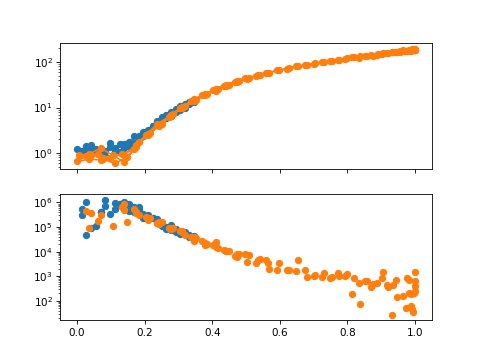

In [280]:
B_list = np.linspace(0.08e-3, 0.18e-3, 51)
cos_list = abs (jj.B_to_cos(B_list))

ids = range(860, 910+1)

Ics = [1e12*extract_Isw_R0_by_id (idx, dy = 30e-6)[0] for idx in ids]
R0s = [1/15*extract_Isw_R0_by_id (idx, dy = 30e-6)[1] for idx in ids]


fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
ax1.plot(cos_list, Ics, 'o-')
ax1.set_yscale('log')

# fig, ax = plt.subplots()
ax2.plot(cos_list, R0s, 'o')
ax2.set_yscale('log')

In [281]:
B_list = np.linspace(-.4e-3, .2e-3, 121)
cos_list = abs (jj.B_to_cos(B_list))

ids = range(689,809+1)

Ics = [2e12*extract_Isw_R0_by_id (idx, dy = 30e-6)[0] for idx in ids]
R0s = [1/15*extract_Isw_R0_by_id (idx, dy = 30e-6)[1] for idx in ids]


# fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
ax1.plot(cos_list, Ics, 'o-')

# fig, ax = plt.subplots()
ax2.plot(cos_list, R0s, 'o')
ax2.set_yscale('log')

..\..\_jjtools\JJ_data_processing.py:285: RuntimeWarning: invalid value encountered in less
  ind1 = np.where(np.abs(vA0) < dx )


## Rb temp again

cos = 1

<IPython.core.display.Javascript object>


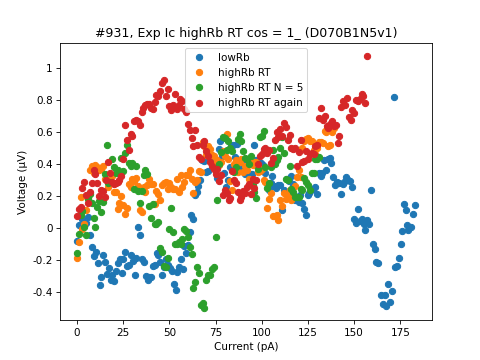

In [318]:
jj.bpbi([911, 916, 919, 931], 
        labels = ['lowRb', 'highRb RT',  'highRb RT N = 5', 'highRb RT again' ])

cos = 0.25

<IPython.core.display.Javascript object>


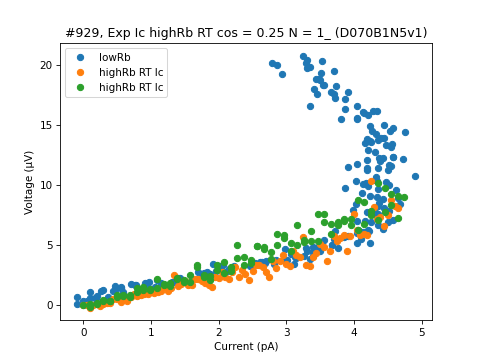

In [315]:
jj.bpbi([913, 930, 929],
        labels = ['lowRb', 'highRb RT',  'highRb RT again'])

idea doesnt work now!!! so the issue was in bad contact?? 

## AWG

<IPython.core.display.Javascript object>


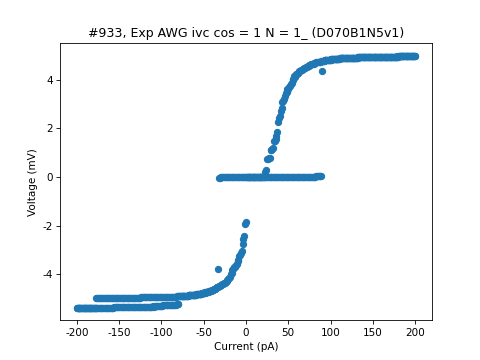

In [323]:
jj.pbi(933)

<IPython.core.display.Javascript object>


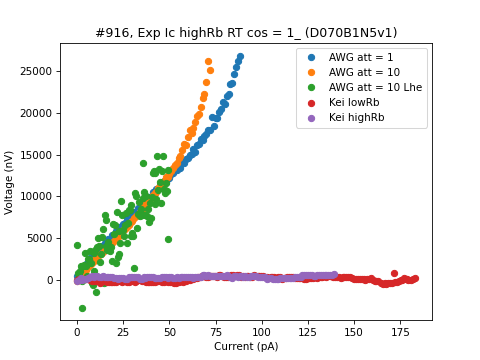

In [330]:
jj.bpbi([935, 936, 939, 911, 916], 
       labels = ['AWG att = 1','AWG att = 10', 'AWG att = 10 Lhe', 
                 'Kei lowRb', 'Kei highRb'])

Lhe adds noise??

switch back to Kei highRb Lhe


## some debugging

<IPython.core.display.Javascript object>


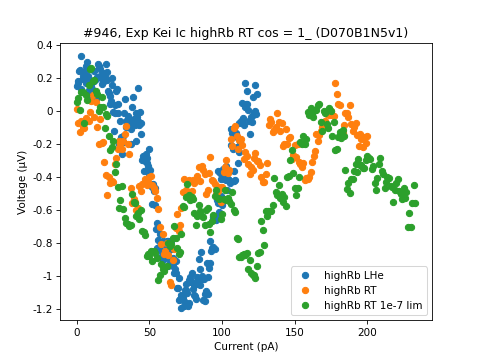

In [348]:
jj.bpbi([940, 944, 946],
        labels = ['highRb LHe', 'highRb RT', 'highRb RT 1e-7 lim'])

<IPython.core.display.Javascript object>


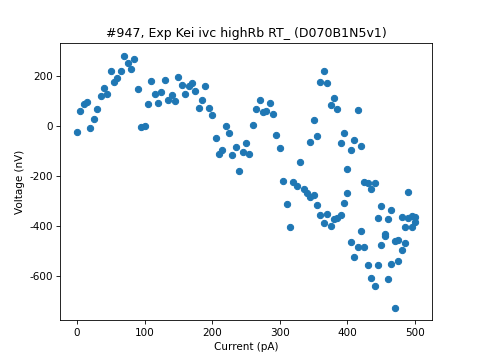

In [353]:
jj.pbi(947)

Isw > 500pA?? why??

<IPython.core.display.Javascript object>


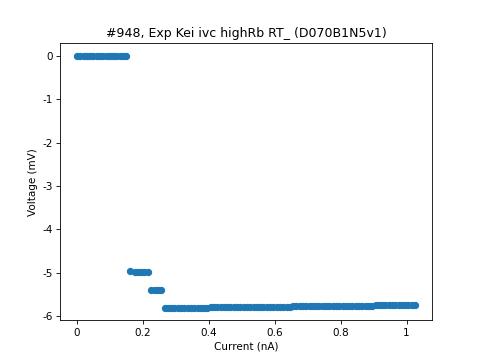

In [357]:
jj.pbi(948)

<IPython.core.display.Javascript object>


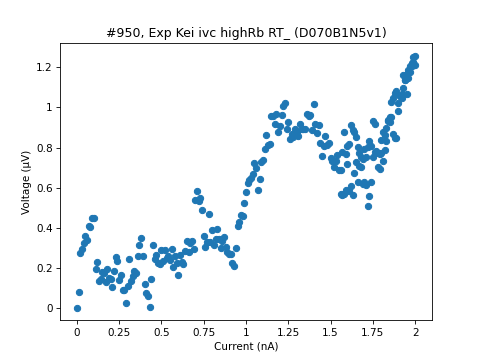

In [355]:
jj.pbi(950)

<IPython.core.display.Javascript object>


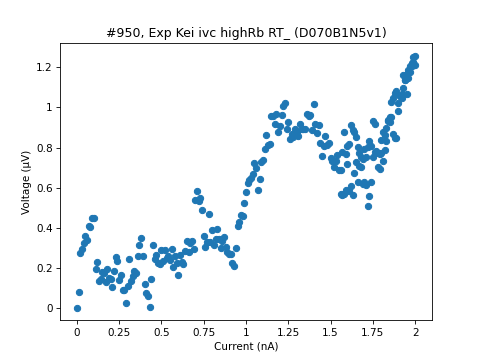

In [355]:
jj.pbi(951)

broken line? works only for flipped polarity??

<IPython.core.display.Javascript object>


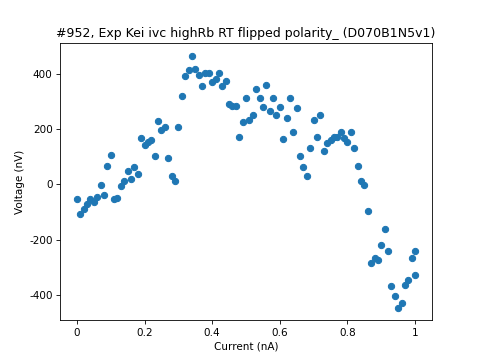

In [362]:
jj.pbi(952)

In [ ]:
something is wrong, check AWG again

<IPython.core.display.Javascript object>


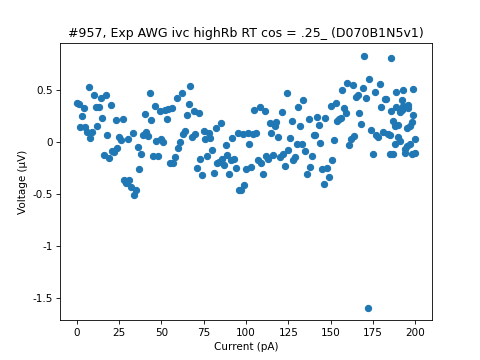

In [367]:
jj.pbi(957)

mb just wrong connection, try kei lowRb once more

<IPython.core.display.Javascript object>


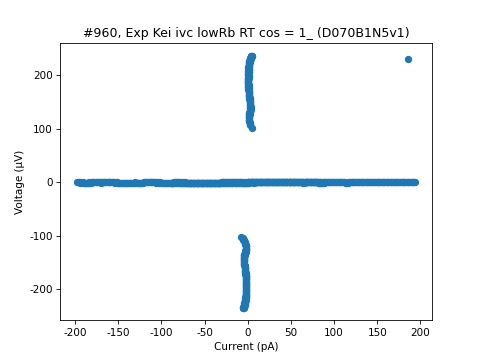

In [376]:
jj.pbi(960)

it works, now repeat everything again...

## Rb temp again..

cos = 1

<IPython.core.display.Javascript object>


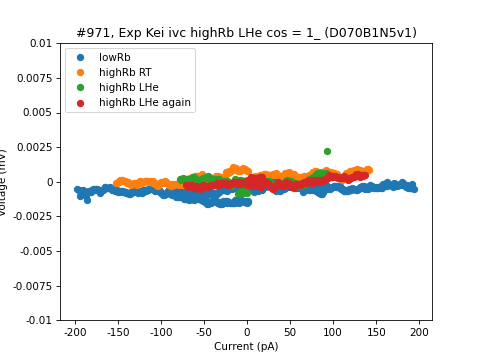

(-1e-05, 1e-05)

In [430]:
ax = jj.bpbi([960, 968, 970, 971], 
        labels = ['lowRb', 'highRb RT',  'highRb LHe', 'highRb LHe again' ])

ax.set_ylim(-10e-6, 10e-6)

cos = 0.25

<IPython.core.display.Javascript object>


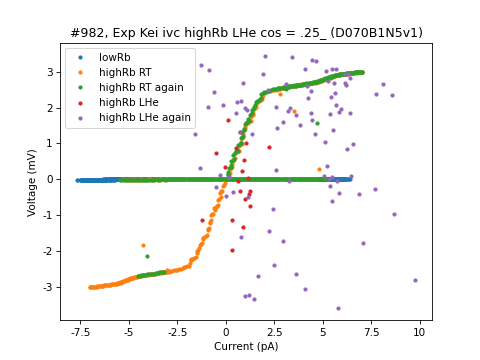

In [459]:
jj.bpbi([963, 966, 967, 973, 982], marker = '.',
        labels = ['lowRb', 'highRb RT',  'highRb RT again',
                  'highRb LHe', 'highRb LHe again'])

argghh something broke again

<IPython.core.display.Javascript object>


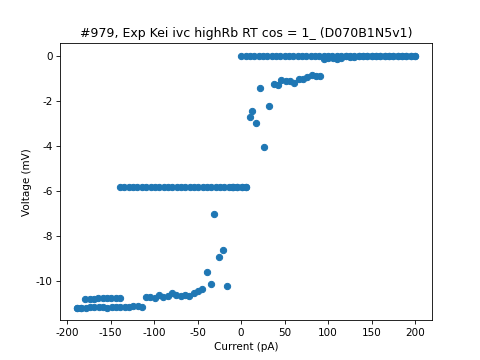

In [444]:
jj.pbi(979) #this is LHe

<IPython.core.display.Javascript object>


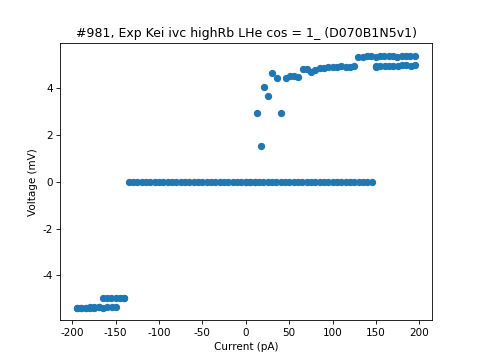

In [451]:
jj.pbi(981) #this is LHe

<IPython.core.display.Javascript object>


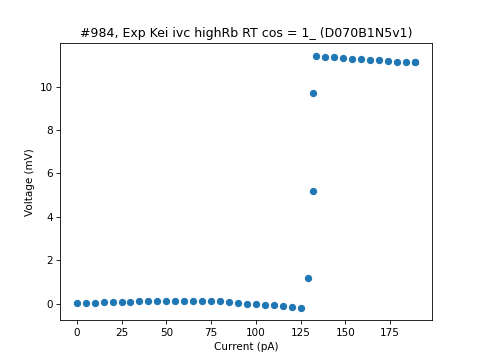

In [461]:
jj.pbi(984)

# Results

## to do

- + check periodicity

- + check Ioffset, is it due to Vmeter?

- + Change temp of Rb

- filter before Rsh

- try direct connection to keith

- Ir gradually changes for diff steps. Ic or Q  changes?

- check two sets of steps?

- play with Rsh, Idut, ..

- T stab?